<a href="https://colab.research.google.com/github/Ruchika-01/E_commerce_Dataset_Analysis/blob/main/E_commerce_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**E_commerce_Dataset_Analysis_Project**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from google.colab import files
uploaded = files.upload()

Saving synthetic_ecommerce_data.csv to synthetic_ecommerce_data.csv


In [ ]:
!cp /content/synthetic_ecommerce_data.csv /content/drive/MyDrive/Dataset

In [7]:
%cd /content/drive/MyDrive/Dataset
!ls

/content/drive/MyDrive/Dataset
'synthetic_ecommerce_data (1).csv'   synthetic_ecommerce_data.csv
'synthetic_ecommerce_data (2).csv'


In [3]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats

In [10]:
#display setting for panda for table
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 120)


## Load data

In [13]:
DATA_PATH = "/content/drive/MyDrive/Dataset/synthetic_ecommerce_data.csv"
df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)

Shape: (100000, 15)


In [14]:
display(df.head(3))
df.info()

,Transaction_ID,Customer_ID,Product_ID,Transaction_Date,Units_Sold,Discount_Applied,Revenue,Clicks,Impressions,Conversion_Rate,Category,Region,Ad_CTR,Ad_CPC,Ad_Spend
0,8b460852-7c64-46fa-998b-b0976879d082,Customer_65,Product_224,2024-10-06,134,0.14,305.54,11,65,0.17,Electronics,Europe,0.0180,0.55,9.90
1,418612e7-8744-4ba3-bb0c-105b47e2a968,Customer_1910,Product_584,2024-10-29,109,0.30,1102.19,15,201,0.07,Home Appliances,Asia,0.1589,0.40,63.56
2,5bc3b98f-cb0c-4b12-947c-df8bbb35a73e,Customer_2306,Product_374,2024-04-04,116,0.04,471.29,16,199,0.08,Toys,Asia,0.0596,1.50,89.40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    100000 non-null  object 
 1   Customer_ID       100000 non-null  object 
 2   Product_ID        100000 non-null  object 
 3   Transaction_Date  100000 non-null  object 
 4   Units_Sold        100000 non-null  int64  
 5   Discount_Applied  100000 non-null  float64
 6   Revenue           100000 non-null  float64
 7   Clicks            100000 non-null  int64  
 8   Impressions       100000 non-null  int64  
 9   Conversion_Rate   100000 non-null  float64
 10  Category          100000 non-null  object 
 11  Region            100000 non-null  object 
 12  Ad_CTR            100000 non-null  float64
 13  Ad_CPC            100000 non-null  float64
 14  Ad_Spend          100000 non-null  float64
dtypes: float64(6), int64(3), object(6)
memory usage: 11.4+ MB


## Data Overview and Missing Value Analysis

In [16]:
# Basic NA check
na_summary = df.isna().sum().sort_values(ascending=False)
print("Missing values per column:\n", na_summary)

Missing values per column:
 Transaction_ID      0
Customer_ID         0
Product_ID          0
Transaction_Date    0
Units_Sold          0
Discount_Applied    0
Revenue             0
Clicks              0
Impressions         0
Conversion_Rate     0
Category            0
Region              0
Ad_CTR              0
Ad_CPC              0
Ad_Spend            0
dtype: int64


In [17]:
# Detect numeric vs non-numeric
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
object_cols  = df.select_dtypes(exclude=[np.number]).columns.tolist()

In [18]:
print("\nNumeric columns:", numeric_cols)
print("Categorical/Other columns:", object_cols)


Numeric columns: ['Units_Sold', 'Discount_Applied', 'Revenue', 'Clicks', 'Impressions', 'Conversion_Rate', 'Ad_CTR', 'Ad_CPC', 'Ad_Spend']
Categorical/Other columns: ['Transaction_ID', 'Customer_ID', 'Product_ID', 'Transaction_Date', 'Category', 'Region']


In [19]:
# Quick unique counts for object columns (top 10)
for col in object_cols[:10]:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(dropna=False).head(10))


Column: Transaction_ID
Transaction_ID
fdd25a6d-03c6-4c41-80b7-94292b9bc76c    1
03b6195a-43a8-4aa5-a87c-c9979da11f62    1
3bbc22fe-b04f-4023-937e-106196390661    1
3cb2e76c-fad2-4177-bb74-6976d8e1159b    1
5eb3f591-5779-46df-8ea7-9168302e27c6    1
a850ccd2-6173-4c7d-8da4-44d73ffa9270    1
4f95e69c-b5e6-4a3c-b770-7423bfa5d21f    1
5df18389-8deb-406d-9b77-17d46c8284a5    1
59e18063-664a-4748-822d-a12561ac550c    1
31792f63-4b36-4e3d-96c6-c1fa4850670c    1
Name: count, dtype: int64

Column: Customer_ID
Customer_ID
Customer_16743    18
Customer_256      17
Customer_11552    15
Customer_18564    15
Customer_2380     14
Customer_17540    14
Customer_6607     14
Customer_16483    14
Customer_14621    14
Customer_14663    14
Name: count, dtype: int64

Column: Product_ID
Product_ID
Product_568    137
Product_215    135
Product_939    133
Product_845    132
Product_746    132
Product_850    129
Product_199    127
Product_347    127
Product_10     126
Product_644    126
Name: count, dtype: int64

## Descriptive Statistics[link text](https://)

In [21]:
desc = df.describe(percentiles=[0.25,0.5,0.75]).T
display(desc)


,count,mean,std,min,25%,50%,75%,max
Units_Sold,100000.0,128.328580,49.679873,51.00,84.0000,127.0000,166.0000,716.00
Discount_Applied,100000.0,0.149871,0.086692,0.00,0.0700,0.1500,0.2200,0.30
Revenue,100000.0,553.110811,428.366294,7.65,221.2600,428.1550,805.8650,5704.18
Clicks,100000.0,24.539170,14.412477,0.00,12.0000,25.0000,37.0000,49.00
Impressions,100000.0,254.539060,141.466606,10.00,132.0000,254.0000,377.0000,499.00
Conversion_Rate,100000.0,0.198138,0.361187,0.00,0.0500,0.1000,0.1900,4.90
Ad_CTR,100000.0,0.104988,0.054806,0.01,0.0575,0.1052,0.1523,0.20
Ad_CPC,100000.0,1.051250,0.549252,0.10,0.5800,1.0500,1.5300,2.00
Ad_Spend,100000.0,110.477240,87.015846,1.05,38.6100,87.2400,164.2200,399.60


**Choose 'Revenue' as the main target column if present**  

**if not, fall back to the first available numeric column to ensure analysis runs smoothly**

In [26]:

target_col = 'Revenue' if 'Revenue' in df.columns else (numeric_cols[0] if numeric_cols else None)

In [28]:
#Summary of Target Column
if target_col:
    print(f"\nSummary for target `{target_col}`:")
    print("mean:", df[target_col].mean())
    print("median:", df[target_col].median())
    print("std:", df[target_col].std())
    print("min/max:", df[target_col].min(), df[target_col].max())


Summary for target `Revenue`:
mean: 553.1108107000001
median: 428.155
std: 428.366294277525
min/max: 7.65 5704.18


## Distributions ( Histogram & Boxplot)





In [29]:
# Choose a numeric column to visualize (default Revenue if available)
plot_col = 'Revenue' if 'Revenue' in df.columns else (numeric_cols[0] if numeric_cols else None)

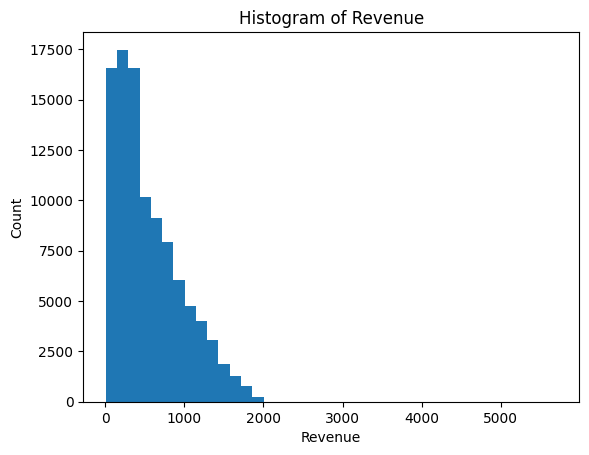

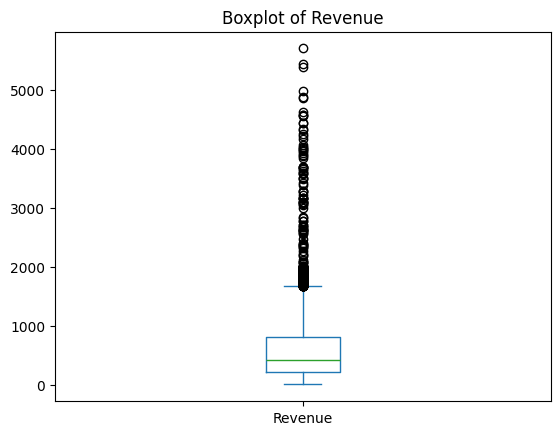

In [30]:

if plot_col:
    # Histogram
    plt.figure()
    df[plot_col].dropna().plot(kind='hist', bins=40)
    plt.title(f'Histogram of {plot_col}')
    plt.xlabel(plot_col)
    plt.ylabel('Count')
    plt.show()

    # Boxplot
    plt.figure()
    df[plot_col].dropna().plot(kind='box')
    plt.title(f'Boxplot of {plot_col}')
    plt.show()
else:
    print("No numeric column found to plot.")

**The histogram of Revenue shows a highly right-skewed distribution, where most transactions have low revenue values while a few transactions contribute very high revenue.**

**The boxplot confirms this skewness, showing several outliers. These outliers represent high-value transactions that significantly influence total sales.**  

**The median revenue lies much closer to the lower quartile, further indicating that a large portion of transactions are low-value.**

## Correlation

In [31]:
if numeric_cols:
    corr = df[numeric_cols].corr()
    display(corr)

    # Rank correlations vs target if present
    if 'Revenue' in df.columns:
        ranked = corr['Revenue'].drop('Revenue').abs().sort_values(ascending=False)
        print("\nAbsolute correlation with Revenue (top 10):")
        display(ranked.head(10))
else:
    print("No numeric columns for correlation.")

,Units_Sold,Discount_Applied,Revenue,Clicks,Impressions,Conversion_Rate,Ad_CTR,Ad_CPC,Ad_Spend
Units_Sold,1.000000,-0.000895,0.044226,0.003540,0.001255,0.000653,0.001044,-0.001812,-0.001615
Discount_Applied,-0.000895,1.000000,-0.129227,-0.002911,-0.003697,0.001598,-0.002839,0.003104,0.000076
Revenue,0.044226,-0.129227,1.000000,0.005784,0.004750,-0.002019,0.009421,0.002643,0.010418
Clicks,0.003540,-0.002911,0.005784,1.000000,0.002034,0.321004,0.003740,-0.005133,-0.001375
Impressions,0.001255,-0.003697,0.004750,0.002034,1.000000,-0.507006,-0.004925,0.006450,0.000413
Conversion_Rate,0.000653,0.001598,-0.002019,0.321004,-0.507006,1.000000,0.004101,-0.007302,-0.001678
Ad_CTR,0.001044,-0.002839,0.009421,0.003740,-0.004925,0.004101,1.000000,0.003616,0.665220
Ad_CPC,-0.001812,0.003104,0.002643,-0.005133,0.006450,-0.007302,0.003616,1.000000,0.664369
Ad_Spend,-0.001615,0.000076,0.010418,-0.001375,0.000413,-0.001678,0.665220,0.664369,1.000000



Absolute correlation with Revenue (top 10):


,Revenue
Discount_Applied,0.129227
Units_Sold,0.044226
Ad_Spend,0.010418
Ad_CTR,0.009421
Clicks,0.005784
Impressions,0.004750
Ad_CPC,0.002643
Conversion_Rate,0.002019


## Group Business Statistics


== Category: mean revenue ==


,Revenue
Category,
Books,589.040928
Clothing,572.408925
Home Appliances,543.756487
Toys,539.146718
Electronics,526.021467



== Category: total revenue ==


,Revenue
Category,
Electronics,11326820.25
Books,11195311.88
Toys,11194842.46
Clothing,11034899.26
Home Appliances,10559207.22



== Region: mean revenue ==


,Revenue
Region,
North America,553.745261
Europe,553.103302
Asia,552.487785



== Region: total revenue ==


,Revenue
Region,
Asia,18492871.13
North America,18419228.61
Europe,18398981.33


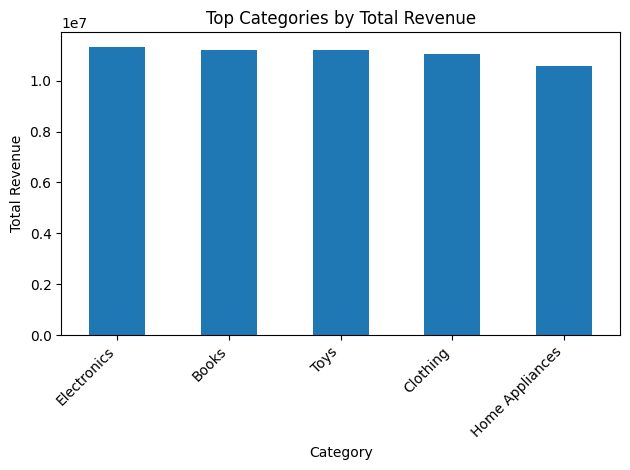

In [32]:
dims = [c for c in ['Category','Region'] if c in df.columns]

for dim in dims:
    print(f"\n== {dim}: mean revenue ==")
    if 'Revenue' in df.columns:
        display(df.groupby(dim)['Revenue'].mean().sort_values(ascending=False).head(10))
    print(f"\n== {dim}: total revenue ==")
    if 'Revenue' in df.columns:
        display(df.groupby(dim)['Revenue'].sum().sort_values(ascending=False).head(10))

# Bar chart for top categories by total revenue
if 'Category' in df.columns and 'Revenue' in df.columns:
    top_cat = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False).head(8)
    plt.figure()
    top_cat.plot(kind='bar')
    plt.title('Top Categories by Total Revenue')
    plt.ylabel('Total Revenue')
    plt.xlabel('Category')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Percentile and Top 10% Transaction

In [33]:

    p90 = df['Revenue'].quantile(0.90)
    top10 = df[df['Revenue'] >= p90]
    share = top10['Revenue'].sum() / df['Revenue'].sum()
    print(f"90th percentile revenue threshold: {p90:,.2f}")
    print(f"Top 10% transactions contribute: {share*100:.2f}% of total revenue")


90th percentile revenue threshold: 1,189.40
Top 10% transactions contribute: 26.26% of total revenue


## Outlier Detection with IQR

In [34]:
col = 'Revenue' if 'Revenue' in df.columns else (numeric_cols[0] if numeric_cols else None)
if col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} IQR bounds: [{lower:,.2f}, {upper:,.2f}] — Outliers: {len(outliers)} / {len(df)} ({len(outliers)/len(df)*100:.2f}%)")
else:
    print("No numeric column available for IQR check.")

Revenue IQR bounds: [-655.65, 1,682.77] — Outliers: 1358 / 100000 (1.36%)


**A simple linear regression was performed to understand how Units Sold influences Revenue.**

coef (slope): 0.3924995026264713
intercept   : 502.94423199972425
R^2 (test) : 0.0014


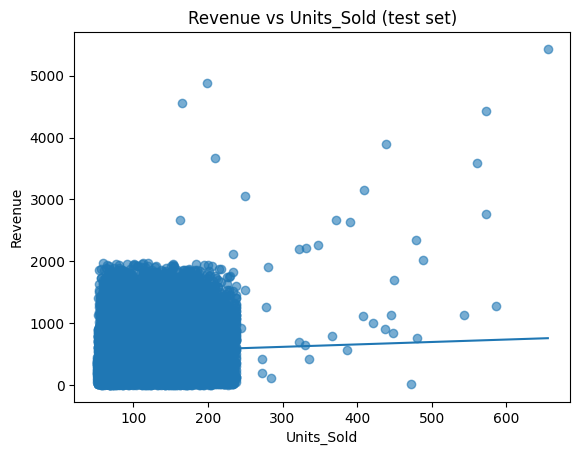

In [35]:
if {'Revenue','Units_Sold'}.issubset(df.columns):
    # Drop rows with NA in the two columns
    tmp = df[['Units_Sold','Revenue']].dropna().copy()
    X = tmp[['Units_Sold']].values
    y = tmp['Revenue'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression().fit(X_train, y_train)
    r2 = model.score(X_test, y_test)
    print("coef (slope):", model.coef_[0])
    print("intercept   :", model.intercept_)
    print("R^2 (test) :", round(r2, 4))

    # Scatter + regression line
    plt.figure()
    plt.scatter(X_test.flatten(), y_test, alpha=0.6)
    xs = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1,1)
    ys = model.predict(xs)
    plt.plot(xs, ys)
    plt.title('Revenue vs Units_Sold (test set)')
    plt.xlabel('Units_Sold')
    plt.ylabel('Revenue')
    plt.show()
else:
    print("Columns `Revenue` and/or `Units_Sold` not found; skipping regression.")


1.**A slightly positive trend can be observed — as the number of units sold increases, the total revenue also tends to increase.**

2.**However, the relationship is weak, as indicated by the nearly flat slope of the regression line.**  

3.
**The wide spread of data points and several high-revenue outliers suggest that other factors (like discounts, product category, or pricing) likely play a significant role in determining total revenue beyond just the number of units sold.**

4.
**Overall, this visualization highlights that while sales volume contributes to revenue, it is not the sole driver, and multivariate analysis could provide a better understanding of revenue patterns.**  
